# Figures
Create some figures to include in slides for my talk.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import astropy.units as u
from astropy.visualization import ImageNormalize,AsinhStretch,SqrtStretch
from astropy.coordinates import SkyCoord
from sunpy.map import Map
import synthesizAR
from synthesizAR.util import heeq_to_hcc_coord

%matplotlib inline

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/matplotlib/__init__.py:576: UserWarning: matplotlibrc text.usetex can not be used with *Agg backend unless dvipng-1.6 or later is installed on your system
  'your system' % dvipng_req)
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
rwb_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'rwb_nice', [(215/255, 48/255, 31/255), (1, 1, 1), (5/255, 112/255, 176/255)], N=1000)

## Magnetogram and Fieldlines

In [3]:
ar_base = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/base_noaa1158/')

Show the fieldlines overlaid on the magnetogram

In [4]:
# Get the smooth magnetogram
magnetogram = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/hmi/hmi_m_45s_2011_02_12_15_33_45_tai_magnetogram.fits')
magnetogram = magnetogram.rotate(order=3)
magnetogram = magnetogram.submap(
    SkyCoord(*u.Quantity([-440,-375],u.arcsec), frame=magnetogram.coordinate_frame),
    SkyCoord(*u.Quantity([-140,-75],u.arcsec), frame=magnetogram.coordinate_frame)
)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


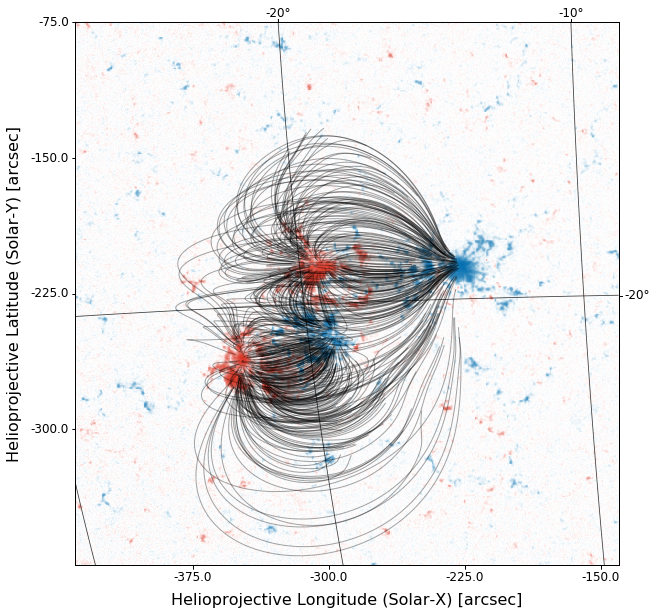

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection=magnetogram)
#ax.tick_params(axis='both',which='both',direction='in')
magnetogram.plot(axes=ax,title=False,cmap=rwb_cmap, 
                 norm=matplotlib.colors.SymLogNorm(100,vmin=-1.5e3,vmax=1.5e3))
ax.grid(alpha=0.)
hgs_grid = magnetogram.draw_grid(axes=ax, grid_spacing=10*u.deg, alpha=0.75, color='k')
for l in ar_base.loops[::10]:
    line = l.coordinates
    coord = (heeq_to_hcc_coord(line[:, 0], line[:, 1], line[:, 2], magnetogram.observer_coordinate)
             .transform_to(magnetogram.coordinate_frame))
    ax.plot_coord(coord, '-', color='k', lw=1,alpha=0.35)
lon,lat = ax.coords[0],ax.coords[1]
lon.set_axislabel(lon.get_axislabel(),fontsize=plt.rcParams['axes.labelsize'])
lat.set_axislabel(lat.get_axislabel(),fontsize=plt.rcParams['axes.labelsize'])
lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
hgs_lon,hgs_lat = hgs_grid[0],hgs_grid[1]
hgs_lon.set_axislabel('')
hgs_lat.set_axislabel('')
hgs_lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
hgs_lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
fig.savefig('../img/magnetogram_plus_lines.png',dpi=300,bbox_inches='tight')

Now, overlay the fieldlines on a composite AIA image (171 + 211 + 131) to show that our traced fieldlines do a decent job of capturing the morphology of the AR.

In [12]:
aia_94 = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/aia/cutouts/aia_lev1.5_20110212T153350_94_cutout.fits')
aia_131 = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/aia/cutouts/aia_lev1.5_20110212T153345_131_cutout.fits')
aia_171 = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/aia/cutouts/aia_lev1.5_20110212T153348_171_cutout.fits')
aia_193 = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/aia/cutouts/aia_lev1.5_20110212T153355_193_cutout.fits')
aia_211 = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/aia/cutouts/aia_lev1.5_20110212T153348_211_cutout.fits')

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


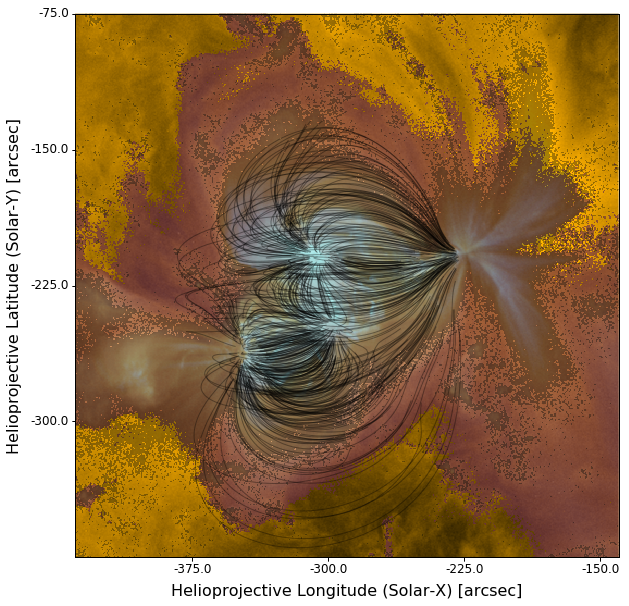

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection=aia_171)
norm=ImageNormalize(vmin=0,vmax=2e3,stretch=AsinhStretch(0.1))
# 211
aia_171.plot(axes=ax,title=False,norm=norm)
# 193
#aia_193_masked = Map(
#    np.ma.masked_less_equal(aia_193.data,1e2),
#    aia_193.meta,
#)
#aia_193_masked.plot(axes=ax,title=False,norm=norm,alpha=0.55)
# 171
aia_211_masked = Map(
    np.ma.masked_less_equal(aia_211.data,1e2),
    aia_211.meta
)
aia_211_masked.plot(axes=ax,title=False,norm=norm,alpha=0.65)
# 131
aia_131_masked = Map(
    np.ma.masked_less_equal(aia_131.data,1.5e1),
    aia_131.meta,
)
aia_131_masked.plot(axes=ax,title=False,norm=norm,alpha=0.35)
ax.grid(alpha=0)
for l in ar_base.loops[::10]:
    line = l.coordinates
    coord = (heeq_to_hcc_coord(line[:, 0], line[:, 1], line[:, 2], magnetogram.observer_coordinate)
             .transform_to(magnetogram.coordinate_frame))
    ax.plot_coord(coord, '-', color='k', lw=1,alpha=0.35)
lon,lat = ax.coords[0],ax.coords[1]
lon.set_axislabel(lon.get_axislabel(),fontsize=plt.rcParams['axes.labelsize'])
lat.set_axislabel(lat.get_axislabel(),fontsize=plt.rcParams['axes.labelsize'])
lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
fig.savefig('../img/aia_171_211_131_plus_lines.png',dpi=300,bbox_inches='tight')

Show the distribution of loop lengths

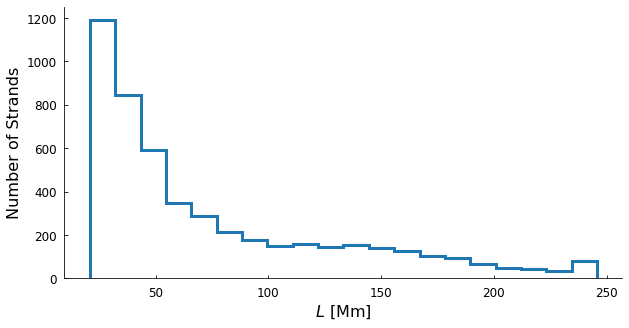

In [53]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.hist([loop.full_length.to(u.Mm).value for loop in ar_base.loops],histtype='step',lw=3,bins='scott',);
ax.set_xlabel(f'$L$ [{ar_base.loops[0].full_length.to(u.Mm).unit.to_string(format="latex")}]')
ax.set_ylabel(r'Number of Strands')
#ax.set_ylim(10,1300)
#ax.set_xlim(10,260)
ax.tick_params(which='both',axis='both',direction='in')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_bounds(15,260)
#ax.spines['bottom'].set_position(('outward',3.))
#ax.spines['left'].set_bounds(100,1300)
#ax.spines['left'].set_position(('outward',3.))
#ax.set_yscale('log')
fig.savefig('../img/loop_length_distribution.png',format='png',dpi=300,bbox_inches='tight')